# El Fenomeno del niño:

El fenómeno del Niño Costero es un patrón climático que ocurre en el Océano Pacífico e impacta en la costa de Perú y Ecuador, causando eventos de calentamiento y enfriamiento del mar. Esto puede resultar en fuertes lluvias, inundaciones y deslizamientos de tierra. En el que estamos principalmente interesados es el 2+1, por el motivo que es el que repercute principalmente con cuentro mar peruano

![Tipos de fenomenos](https://ciifen.org/wp-content/uploads/2022/03/CIIFEN_regiones_nino.png)


El fenomeno tiende a varias y ser muy impredicible, el fenomeno 2+1 es el que afecta directamente al Perú y otros paices cercanos.En este ultimo nos enfocaremos en en estudiar su comportamiento. Para determinar que tipo de fenomeno habra nos vamos a enfocar en la temepratura del mar peruano, si se calenta demasiado probocara un niño y si esta frio porbocara una niña o neutro. Segun el Senamhi, estima que sera un fenomeno de la niña debil o neutro, pero las lecturas de temperatura del mar suelen variar un mes al otro suelen, haciendo que la prediccion no sea muy precisa. 

![fenomenos](https://www.senamhi.gob.pe/usr/dms/dato_tsm/ostia/diario/hsur/ostia_anom_hsur_20241024.png)

![Animacion del litroal peruano](https://www.senamhi.gob.pe/usr/dms/dato_tsm/ostia/diario/peru/ostia_anom_peru_20241101.png)

# Que tenemos?

Actualimente contamos con un pequeño dataset de mapas de calor comprimidos en archivos nc. 

In [5]:
!dir "G:\Datos SST\mapa de calor"

 El volumen de la unidad G es Nuevo vol
 El n£mero de serie del volumen es: 6CCC-A33F

 Directorio de G:\Datos SST\mapa de calor

02/11/2024  22:53    <DIR>          .
02/11/2024  22:40    <DIR>          ..
02/11/2024  22:49       833,442,684 1958.zip
14/10/2024  20:40    <DIR>          1968
14/10/2024  20:43    <DIR>          1978
14/10/2024  20:39    <DIR>          1988
14/10/2024  20:41    <DIR>          1998
14/10/2024  20:42    <DIR>          2008
14/10/2024  20:39    <DIR>          2018
               1 archivos    833,442,684 bytes
               8 dirs  118,715,133,952 bytes libres


En total tenemos  un registro desde 1958 al 2024 donde se ha tomado el registro de la temperatura sobre el nivel del mar. En toatal son 12 meses por 66 años de registro, dando un toal de 792 mapas, esto lo consideramos relativamente poco como para entrenal un modelo robusto.

In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

#np.set_printoptions(threshold=np.inf)

dataset =xr.open_dataset(r"G:\Datos SST\mapa de calor\1968\dataset\sosstsst_control_monthly_highres_2D_196801_CONS_v0.1.nc")

print(dataset)
print("--------------------------------------------------------------------------->")
print(dataset["sosstsst"])


<xarray.Dataset> Size: 18MB
Dimensions:       (y: 1021, x: 1442, time_counter: 1)
Coordinates:
    nav_lat       (y, x) float32 6MB ...
    nav_lon       (y, x) float32 6MB ...
  * time_counter  (time_counter) datetime64[ns] 8B 1968-01-16
Dimensions without coordinates: y, x
Data variables:
    sosstsst      (time_counter, y, x) float32 6MB ...
Attributes:
    Conventions:  CF-1.4
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    title:        Monthly mean 2D Sea Surface fields
    source:       ORAS5 - backward extension (ECMWF)
    institution:  European Centre for Medium-Range Weather Forecasts (ECMWF) ...
    reference:    https://www.ecmwf.int/en/research/climate-reanalysis/ocean-...
--------------------------------------------------------------------------->
<xarray.DataArray 'sosstsst' (time_counter: 1, y: 1021, x: 1442)> Size: 6MB
[1472282 values with dtype=float32]
Coordinates:
    nav_lat       (y, x) float32 6MB ...
    nav_lon       (y, x)

In [6]:
!dir "G:\Datos SST\mapa de calor\1978\dataset"

 El volumen de la unidad G es Nuevo vol
 El n£mero de serie del volumen es: 6CCC-A33F

 Directorio de G:\Datos SST\mapa de calor\1978\dataset

14/10/2024  20:44    <DIR>          .
14/10/2024  20:43    <DIR>          ..
04/10/2024  01:10        17,690,957 sosstsst_control_monthly_highres_2D_197801_CONS_v0.1.nc
04/10/2024  01:10        17,690,957 sosstsst_control_monthly_highres_2D_197802_CONS_v0.1.nc
04/10/2024  01:10        17,690,957 sosstsst_control_monthly_highres_2D_197803_CONS_v0.1.nc
04/10/2024  01:10        17,690,957 sosstsst_control_monthly_highres_2D_197804_CONS_v0.1.nc
04/10/2024  01:10        17,690,957 sosstsst_control_monthly_highres_2D_197805_CONS_v0.1.nc
04/10/2024  01:10        17,690,957 sosstsst_control_monthly_highres_2D_197806_CONS_v0.1.nc
04/10/2024  01:10        17,690,957 sosstsst_control_monthly_highres_2D_197807_CONS_v0.1.nc
04/10/2024  01:10        17,690,957 sosstsst_control_monthly_highres_2D_197808_CONS_v0.1.nc
04/10/2024  01:10        17,690,957 sosstsst

# Manejando la data

Ya que no somos computadoras apartir de aqui vamos a ver la data de manera visual para poder entender que es lo que estamos haciendo.

1. En esta primera parte se ha obtado por eliminar la informacion de los polos, ya que lo consideramos informacion irrelevante porque es temperatura fria, no caliente.

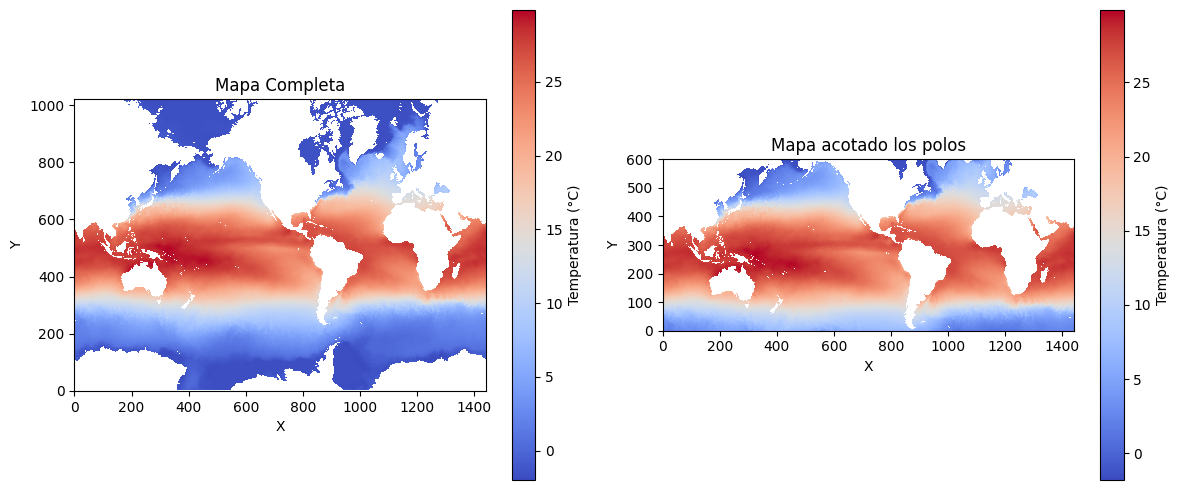

In [1]:
import xarray as xr
import matplotlib.pyplot as plt


ds = xr.open_dataset(r"G:\Datos SST\mapa de calor\1968\dataset\sosstsst_control_monthly_highres_2D_196801_CONS_v0.1.nc")
tempMar = ds["sosstsst"] 
tempMar_R = tempMar[0, 225:825, :]


fig, axs = plt.subplots(1, 2, figsize=(12, 5))


pcm1 = axs[0].pcolormesh(tempMar[0, :, :], cmap='coolwarm')
axs[0].set_title('Mapa Completa')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_aspect('equal', adjustable='box')
fig.colorbar(pcm1, ax=axs[0], label='Temperatura (°C)')


pcm2 = axs[1].pcolormesh(tempMar_R, cmap='coolwarm')
axs[1].set_title('Mapa acotado los polos')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_aspect('equal', adjustable='box')
fig.colorbar(pcm2, ax=axs[1], label='Temperatura (°C)')

plt.tight_layout()
plt.show()


Otro conjunto de data que se tiene es el registro de los diversons meses que se determinaron con un indice en anomalias.

In [1]:
import pandas as pd
import numpy as np

path_excel = r"G:\Datos SST\notebook\doc\Clasificacion indice ICEN.xlsx"

df = pd.read_excel(path_excel, sheet_name='Niño 1+2 (Anomaly)')

print(df)

print(df['fecha'][:5])

df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

print("\n","="*100,"\n")
print(df['fecha'][:5])

df = df[['fecha', 'Anomalia']]

y_train = df[df['fecha'] <= '2016-12-31']
y_validation = df[df['fecha'] >= '2017-01-01']

y_train = y_train['Anomalia'].to_numpy()
y_validation  = y_validation['Anomalia'].to_numpy()

print(y_train.shape, y_validation.shape)

         fecha   Anomalia  Unnamed: 2   Unnamed: 3   Unnamed: 4   Unnamed: 5  \
0   1958-01-01       0.14           n   800.000000          NaN          1.0   
1   1958-02-01       0.26         max     4.470000          NaN          2.0   
2   1958-03-01       0.48         min    -2.670000          NaN          3.0   
3   1958-04-01       0.71       rango     7.140000          NaN          4.0   
4   1958-05-01       0.12           k    10.580197         11.0          5.0   
..         ...        ...         ...          ...          ...          ...   
795 2024-04-01      -0.21         NaN          NaN          NaN          NaN   
796 2024-05-01      -1.17         NaN          NaN          NaN          NaN   
797 2024-06-01      -0.95         NaN          NaN          NaN          NaN   
798 2024-07-01      -0.79         NaN          NaN          NaN          NaN   
799 2024-08-01      -0.46         NaN          NaN          NaN          NaN   

        -2.67   Unnamed: 7   Unnamed: 8

# Que hacer? 

Agrupacion de Arreglo: La agrupación de imágenes en el dataset se usó principalmente para mejorar la eficiencia del procesamiento y facilitar el análisis.
* Mejor Representación de Datos: La agrupación de datos ayudo a representar patrones importantes de manera más clara. Al agrupar, es posible reducir el ruido o las variaciones menores entre imágenes similares, lo que facilita al modelo identificar las características principales en el dataset.

* Uniformidad en el Entrenamiento: La agrupación también permite que los datos sean más consistentes en su formato y contenido, lo que ayuda a entrenar el modelo de forma más efectiva y uniforme.

* Simplificación del Proceso de Análisis: Finalmente, agrega que la agrupación ayuda a enfocarse en las categorías o clases más relevantes, eliminando variaciones innecesarias que podrían complicar el análisis y el aprendizaje del modelo.

1. Coarsen: Divides el dataset en bloques de un tamaño específico en cada dimensión y aplicas una función (como promedio o mínimo) en cada bloque. Este proceso se llama "agregación".

In [1]:
import xarray as xr
import numpy as np

# Crear un DataArray 5x4 de ejemplo
data = xr.DataArray(
    np.array([[3, 7, 12, 16],
              [4, 5, 10, 14],
              [9, 11, 8, 13],
              [15, 6, 2, 17],
              [1, 18, 19, 20]]),
    dims=("y", "x")
)

result = data.coarsen(y=2, x=2, boundary="trim").mean()
print(result)


<xarray.DataArray (y: 2, x: 2)> Size: 32B
array([[ 4.75, 13.  ],
       [10.25, 10.  ]])
Dimensions without coordinates: y, x


In [62]:
# Agupacion simple cada 2 elementos 
import numpy as np

matriz = np.random.rand(5, 5) 
print(matriz)

matrizRes = matriz[::2, ::2]
print("Matriz resultante:")
print(matrizRes)



[[0.69086284 0.27452872 0.14495196 0.08588686 0.69321796]
 [0.08179275 0.8622953  0.70906522 0.6047618  0.34847217]
 [0.80168474 0.99701283 0.30951772 0.90615545 0.79470084]
 [0.10753204 0.26750356 0.92508722 0.03589075 0.70100439]
 [0.18119181 0.91656843 0.71597807 0.92505312 0.22055528]]
Matriz resultante:
[[0.69086284 0.14495196 0.69321796]
 [0.80168474 0.30951772 0.79470084]
 [0.18119181 0.71597807 0.22055528]]


Los filtros: La idea de usar filtos es con la finalidad de:

Reducción de Ruido: Tanto el filtro gaussiano como el de Wiener son efectivos para eliminar el ruido de las imágenes o los datos. Esto es crucial en la agrupación, ya que el ruido puede distorsionar los resultados y llevar a agrupaciones inexactas.

Suavizado de Imágenes: Estos filtros suavizan los datos al reducir las variaciones bruscas, lo que ayuda a resaltar características más relevantes y mejora la calidad de las imágenes o datos procesados.

Mejora de la Segmentación: En la agrupación, especialmente en contextos de visión por computadora, es esencial tener bordes claros y definidos. Los filtros ayudan a mejorar la segmentación de los datos, permitiendo que los algoritmos de agrupamiento funcionen mejor.

Preservación de Detalles: Aunque suavizan los datos, los filtros de Wiener, en particular, pueden adaptarse a la variabilidad local, preservando más detalles que otros métodos de suavizado.

# El Wiener:
La teoría de filtrado de Wiener-Kolmogorov busca reducir el ruido en una señal de entrada mediante métodos estadísticos, de modo que la señal de salida se aproxime, en el sentido cuadrático medio, a una señal deseada sin ruido.
* Reducir el ruido y resaltar los detalles importantes en tus imágenes.
* Mejorar la precisión del modelo al facilitar que aprenda características esenciales sin el "distractor" del ruido.
* Minimizar el error al hacer que la representación de los datos sea más fiel a los objetos que estás intentando clasificar o predecir.

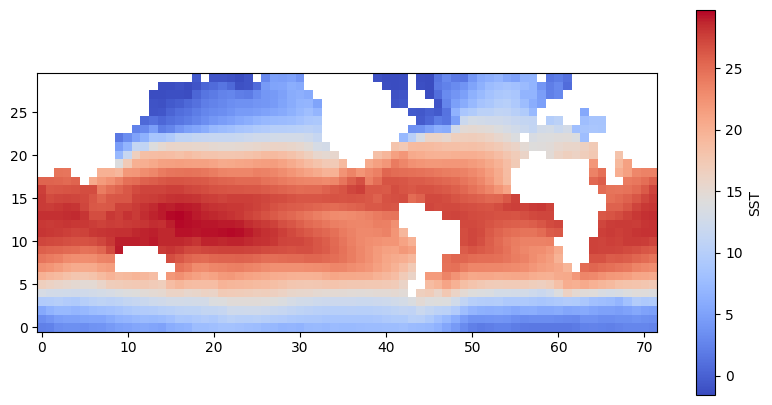

In [34]:
#agrupacion con filtro wiener restablecindo los nan
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import wiener

# Cargar el archivo
dataset = xr.open_dataset(r"G:\Datos SST\mapa de calor\1968\dataset\sosstsst_control_monthly_highres_2D_196801_CONS_v0.1.nc")
sst_data = dataset['sosstsst'][0, 225:825, ::]

# Convertir a numpy y crear máscara de NaN
sst_data_np = sst_data.values
nan_mask = np.isnan(sst_data_np)

# Llenar NaNs temporalmente con ceros y aplicar el filtro Wiener
sst_data_filled = np.nan_to_num(sst_data_np, nan=0)
filtered_data = wiener(sst_data_filled, (5, 5))

# Restaurar los NaNs en la salida filtrada
filtered_data[nan_mask] = np.nan

# Convertir el resultado filtrado a un DataArray para conservar coordenadas y dimensiones
sst_filtered = xr.DataArray(
    filtered_data,
    coords=sst_data.coords,
    dims=sst_data.dims
)

# Reducir resolución (hacer subsampling) después de la filtración
sst_reduced = sst_filtered.coarsen(y=20, x=20, boundary="trim").mean()

# Plotear el resultado final
plt.figure(figsize=(10, 5))
plt.imshow(sst_reduced, cmap='coolwarm', origin='lower')
plt.colorbar(label='SST')
plt.show()


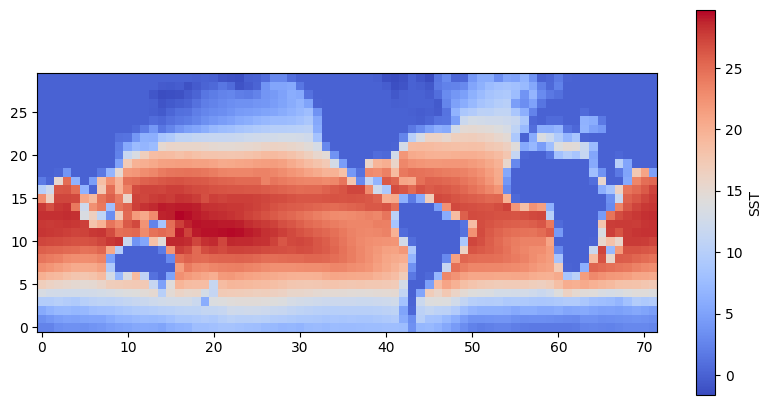

In [35]:
#agrupacion con filtro wiener sin restablecer los valores nan
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import wiener

# Cargar el archivo
dataset = xr.open_dataset(r"G:\Datos SST\mapa de calor\1968\dataset\sosstsst_control_monthly_highres_2D_196801_CONS_v0.1.nc")
sst_data = dataset['sosstsst'][0, 225:825, ::]



# Convertir a numpy y crear máscara de NaN
sst_data_np = sst_data.values
nan_mask = np.isnan(sst_data_np)

# Llenar NaNs temporalmente con ceros y aplicar el filtro Gaussiano o Wiener
sst_data_filled = np.nan_to_num(sst_data_np, nan=0)
filtered_data = wiener(sst_data_filled, (5, 5))

# Restaurar los NaNs en la salida filtrada
filtered_data[nan_mask] = np.nan

sst_data = xr.DataArray(
    sst_data_filled, 
    coords=sst_data.coords, 
    dims=sst_data.dims
)


# Reducir resolución (hacer subsampling)
filtered_data = sst_data.coarsen(y=20, x=20, boundary="trim").mean() 


# Plotear
plt.figure(figsize=(10, 5))
plt.imshow(filtered_data, cmap='coolwarm', origin='lower')
plt.colorbar(label='SST')
plt.show()


# El Filtro gaussiano:

El proceso de filtrado gaussiano emplea una función de distribución normal para suavizar una señal o imagen, lo que reduce las variaciones bruscas y el ruido de alta frecuencia, preservando los patrones principales.

* Reducción del ruido: Minimiza el ruido en las imágenes suavizando detalles menos relevantes, lo que ayuda a resaltar las características fundamentales.
* Mejora del modelo: Facilita el aprendizaje de características esenciales, eliminando el "distractor" del ruido para un modelo de aprendizaje más preciso.
* Optimización de datos: Ayuda a que los datos representen de manera más fiel las estructuras relevantes en las imágenes, lo cual es útil para mejorar la clasificación o predicción.

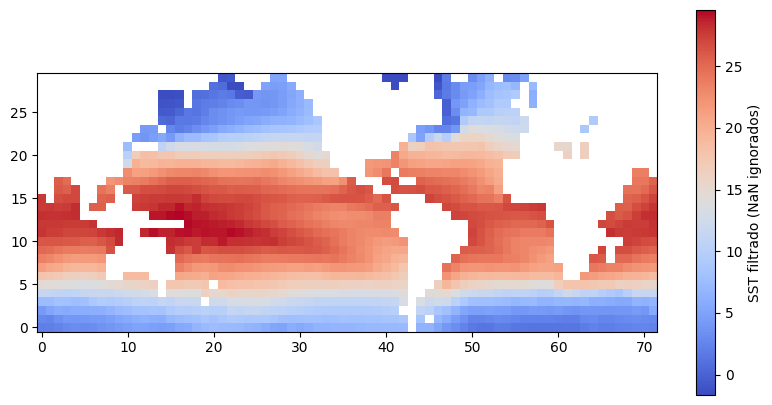

In [43]:
# agrupacion con filtro gaussiano
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter


# Cargar el archivo
dataset = xr.open_dataset(r"G:\Datos SST\mapa de calor\1968\dataset\sosstsst_control_monthly_highres_2D_196801_CONS_v0.1.nc")
sst_data = dataset['sosstsst'][0, 225:825, ::]

sst_data1 = gaussian_filter(sst_data.values, sigma=2.2)  
sst_data = xr.DataArray(
    sst_data1, 
    coords=sst_data.coords, 
    dims=sst_data.dims
)

#sigma controla el suabisado

sst_data = sst_data.coarsen(y=20, x=20, boundary="trim").min() 

plt.figure(figsize=(10, 5))
plt.imshow(sst_data, cmap='coolwarm', origin='lower', interpolation='nearest')  
plt.colorbar(label='SST filtrado (NaN ignorados)')
plt.show()


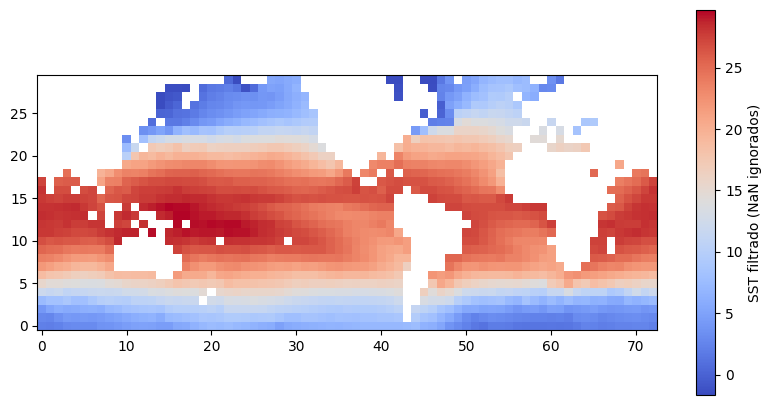

In [45]:
# agrupacion sin filtos de 20 en 20
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

# Cargar el archivo
dataset = xr.open_dataset(r"G:\Datos SST\mapa de calor\1968\dataset\sosstsst_control_monthly_highres_2D_196801_CONS_v0.1.nc")
sst_data = dataset['sosstsst'][0, 225:825, ::]



sst_data = sst_data[::20, ::20]

plt.figure(figsize=(10, 5))
plt.imshow(sst_data, cmap='coolwarm', origin='lower', interpolation='nearest')  
plt.colorbar(label='SST filtrado (NaN ignorados)')
plt.show()

---------------------------------------------------------------------------------------->
(75, 120)


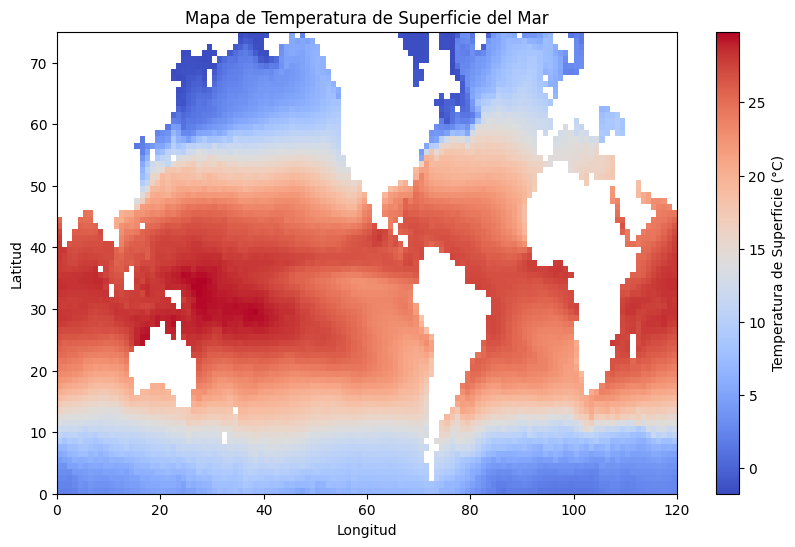

In [2]:
# con metodo coarsen mixto
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


ds = xr.open_dataset(r"G:\Datos SST\mapa de calor\1968\dataset\sosstsst_control_monthly_highres_2D_196801_CONS_v0.1.nc")
temp_surface = ds["sosstsst"] [0, 225:825,::]  

print("---------------------------------------------------------------------------------------->")

temp_surface_rounded = temp_surface.round()
temp_surface = temp_surface.coarsen(y=4, x=6, boundary="trim").mean() 


temp_surface = temp_surface[::2, ::2]
print(temp_surface.shape)
plt.figure(figsize=(10, 6))
plt.pcolormesh(temp_surface, cmap='coolwarm')
plt.colorbar(label='Temperatura de Superficie (°C)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de Temperatura de Superficie del Mar')
plt.show()



Esto es el mapa con una agrupacion tomando el primer elemento de 20 en 20

(30, 73)


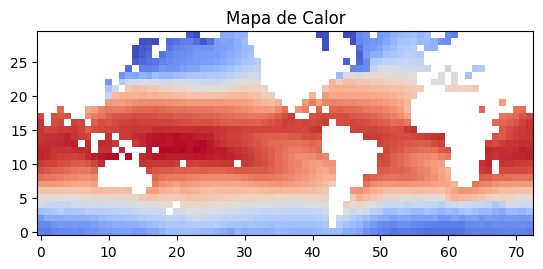

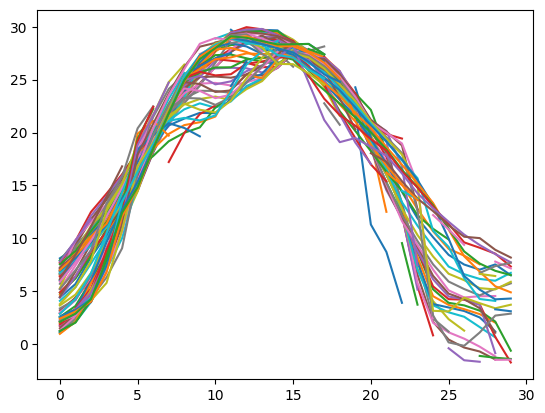

In [5]:
# Agrupacion simple
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Cargar el archivo netCDF (asegúrate de poner la ruta correcta)
ds = xr.open_dataset(r"G:\Datos SST\1958\dataset\sosstsst_control_monthly_highres_2D_195801_CONS_v0.1.nc")
DataUtil = ds["sosstsst"] [0, 225:825,::]  # Cambia 'variable_de_temperatura' por el nombre real en tu archivo


DataUtil = DataUtil[::20, ::20]
print(DataUtil.shape)
plt.imshow(DataUtil, cmap='coolwarm',origin='lower')
#plt.colorbar()  # Agregar barra de colores

plt.title("Mapa de Calor")
plt.show()


plt.plot(DataUtil)  # Visualiza como gráfico lineal
plt.show()


# Mostrando Datos

Shape of data: (708, 100, 120)
Shape of data[1]: (100, 120)


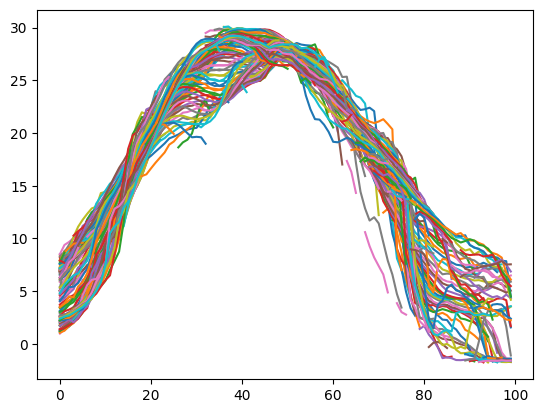

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo .npy
data = np.load(r"G:\Datos SST\mapa de calor\numpy\Entrenamiento.npy")

# Imprimir el contenido (para datos pequeños o texto)
print("Shape of data:", data.shape)      # Ver forma del conjunto de datos
print("Shape of data[1]:", data[1].shape)  # Ver forma de la primera entrada

plt.plot(data[0])  # Visualiza como gráfico lineal
plt.show()

Al final nos quedamos con coarsen puro, esto lo almacenamos en archivos npy:

(600, 1442)


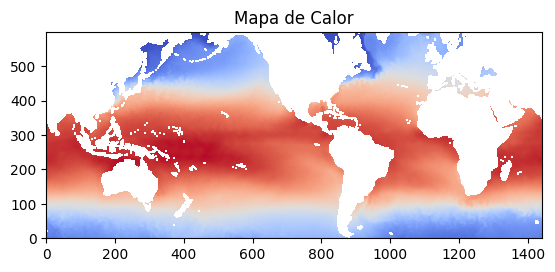

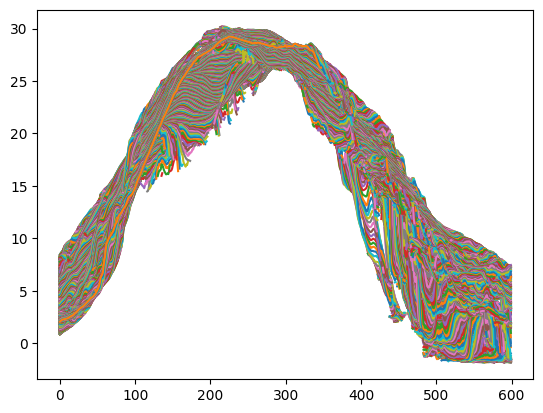

In [6]:
# Esto es el mapa Original.
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Cargar el archivo netCDF (asegúrate de poner la ruta correcta)
ds = xr.open_dataset(r"G:\Datos SST\1958\dataset\sosstsst_control_monthly_highres_2D_195801_CONS_v0.1.nc")
DataUtil = ds["sosstsst"] [0, 225:825,::]  # Cambia 'variable_de_temperatura' por el nombre real en tu archivo



print(DataUtil.shape)
plt.imshow(DataUtil, cmap='coolwarm',origin='lower')
#plt.colorbar()  # Agregar barra de colores

plt.title("Mapa de Calor")
plt.show()


plt.plot(DataUtil)  # Visualiza como gráfico lineal
plt.show()


(30, 73)


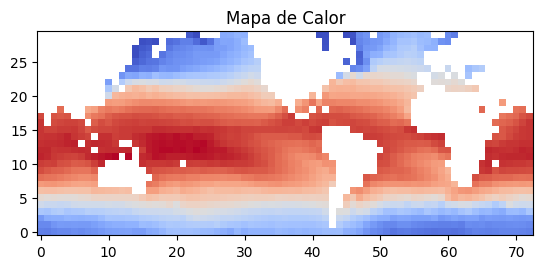

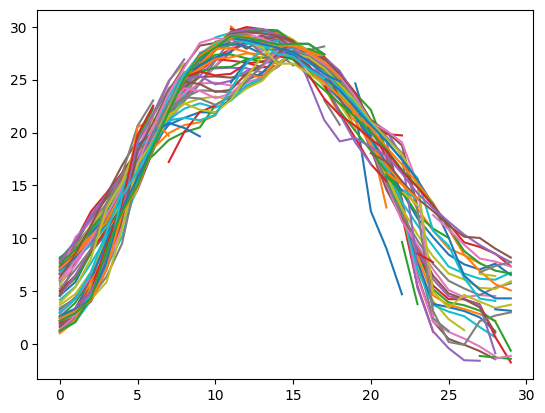

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo .npy
data = np.load(r"G:\Datos SST\1958\Entrenamiento\1958-01.npy")

# Crear el mapa de calor
print(data.shape)
plt.imshow(data, cmap='coolwarm',origin='lower')
#plt.colorbar()  # Agregar barra de colores
plt.title("Mapa de Calor")
plt.show()


plt.plot(data)  # Visualiza como gráfico lineal
plt.show()


# Automatizacion

In [22]:
# se guardan los archivos npy en una campeta designada
import xarray as xr
import numpy as np
import os

# Ruta de la carpeta con los archivos .nc
carpeta = r"G:\Datos SST\mapa de calor\2018\dataset"
# Ruta de salida para los archivos .npy
carpeta_salida = r"G:\Datos SST\mapa de calor\numpy\Matriz de 4,6 ,2,2,\Entrenamiento"

# Asegúrate de que la carpeta de salida exista
os.makedirs(carpeta_salida, exist_ok=True)

# Configuración de los bloques para la reducción de resolución
block_y = 4
block_x = 6


elementos = os.listdir(carpeta)

#for archivo in elementos[:2]:
for archivo in elementos:
    # Cargar el archivo netCDF
    ruta_archivo = os.path.join(carpeta, archivo)
    ds = xr.open_dataset(ruta_archivo)
    temp_surface = ds["sosstsst"][0, 225:825, ::]  # Cambia 'sosstsst' si es necesario
    first_time = ds.time_counter.values[0]
    first_time = str(first_time)
    print("---------------------")
    print(first_time[:7])
    # Aplica la reducción de resolución con coarsen
    temp_surface = temp_surface.coarsen(y=block_y, x=block_x, boundary="trim").max()
    # Reduce aún más la resolución cada 10 índices
    temp_surface = temp_surface[::2, ::2]


    # Guardar el resultado en un archivo .npy con el mismo nombre que el archivo original
    nombre_salida = first_time[:7] + ".npy"
    ruta_salida = os.path.join(carpeta_salida, nombre_salida)
    np.save(ruta_salida, temp_surface.values)
    
    print(f"Archivo {archivo} procesado y guardado como {nombre_salida}")

print("Todos los archivos han sido procesados y guardados.")


---------------------
2018-01
Archivo sosstsst_control_monthly_highres_2D_201801_OPER_v0.1.nc procesado y guardado como 2018-01.npy
---------------------
2018-02
Archivo sosstsst_control_monthly_highres_2D_201802_OPER_v0.1.nc procesado y guardado como 2018-02.npy
---------------------
2018-03
Archivo sosstsst_control_monthly_highres_2D_201803_OPER_v0.1.nc procesado y guardado como 2018-03.npy
---------------------
2018-04
Archivo sosstsst_control_monthly_highres_2D_201804_OPER_v0.1.nc procesado y guardado como 2018-04.npy
---------------------
2018-05
Archivo sosstsst_control_monthly_highres_2D_201805_OPER_v0.1.nc procesado y guardado como 2018-05.npy
---------------------
2018-06
Archivo sosstsst_control_monthly_highres_2D_201806_OPER_v0.1.nc procesado y guardado como 2018-06.npy
---------------------
2018-07
Archivo sosstsst_control_monthly_highres_2D_201807_OPER_v0.1.nc procesado y guardado como 2018-07.npy
---------------------
2018-08
Archivo sosstsst_control_monthly_highres_2D_20

Es  algorimo concatena los archivos npy en y les da una dimencion mas

In [23]:
import os
import numpy as np

# Rutas
carpeta = r"G:\Datos SST\mapa de calor\numpy\Matriz de 4,6 ,2,2,\Entrenamiento"
destino = r"G:\Datos SST\mapa de calor\numpy\Matriz de 4,6 ,2,2,"

# Obtener y ordenar la lista de archivos cronológicamente
archivos = sorted(
    [f for f in os.listdir(carpeta) if f.endswith('.npy')],
    key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1][:2]))
)

# Cargar y concatenar los datos con una nueva dimensión al inicio
datos_concatenados = []
for archivo in archivos:
    datos = np.load(os.path.join(carpeta, archivo))
    datos = np.expand_dims(datos, axis=0)  # Agregar nueva dimensión al inicio
    datos_concatenados.append(datos)

# Concatenar en la nueva dimensión (al inicio)
datos_concatenados = np.concatenate(datos_concatenados, axis=0)

# Guardar en un nuevo archivo
np.save(os.path.join(destino, 'Entrenamiento.npy'), datos_concatenados)
print("Archivo guardado como 'Entrenamiento.npy'")



Archivo guardado como 'Entrenamiento.npy'


In [24]:
import os
import numpy as np

# Rutas
carpeta = r"G:\Datos SST\mapa de calor\numpy\Matriz de 4,6 ,2,2,\Validacion"
destino = r"G:\Datos SST\mapa de calor\numpy\Matriz de 4,6 ,2,2,"

# Obtener y ordenar la lista de archivos cronológicamente
archivos = sorted(
    [f for f in os.listdir(carpeta) if f.endswith('.npy')],
    key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1][:2]))
)

# Cargar y concatenar los datos con una nueva dimensión al inicio
datos_concatenados = []
for archivo in archivos:
    datos = np.load(os.path.join(carpeta, archivo))
    datos = np.expand_dims(datos, axis=0)  # Agregar nueva dimensión al inicio
    datos_concatenados.append(datos)

# Concatenar en la nueva dimensión (al inicio)
datos_concatenados = np.concatenate(datos_concatenados, axis=0)

# Guardar en un nuevo archivo
np.save(os.path.join(destino, 'Validacion.npy'), datos_concatenados)
print("Archivo guardado como 'Validacion.npy'")



Archivo guardado como 'Validacion.npy'


In [3]:
# se establecen los nhn a ceros para poder pasarlo a la red neuronal
import numpy as np

# Carga el archivo npy
array = np.load(r"G:\Datos SST\mapa de calor\numpy\Matriz de 4,6 ,2,2,\Entrenamiento.npy")

# Reemplaza los NaN con 0
array = np.nan_to_num(array, nan=0)

# Guarda el archivo actualizado si necesitas sobreescribir el original
np.save(r"G:\Datos SST\mapa de calor\numpy\Matriz de 4,6 ,2,2,\Entrenamiento_sin_nan.npy", array)
print("Listo")



Listo


In [32]:
# se establecen los nhn a ceros para poder pasarlo a la red neuronal
import numpy as np

# Carga el archivo npy
array = np.load(r"G:\Datos SST\mapa de calor\numpy\Matriz de 4,6 ,2,2,\Validacion.npy")

# Reemplaza los NaN con 0
array = np.nan_to_num(array, nan=0)

# Guarda el archivo actualizado si necesitas sobreescribir el original
np.save(r"G:\Datos SST\mapa de calor\numpy\Matriz de 4,6 ,2,2,\Validacion_sin_nan.npy", array)
print("Listo")



Listo


# Informe completo en: [Investigacion de prediccion de NIÑO 1+2](https://1drv.ms/w/c/f967a4492d892303/ETwFvcO59fJEjCAK_hcVrpIBpka28R_w4jMTBTG4uGv2sw?e=gJUIPz)